Este cuaderno presenta la implementación de una red neuronal para resolver un problema de clasificación binaria. Como parte del curso Fundamentos de Redes Neuronales con Python y Keras de Platzi.  
Inicialmente, se genera un conjunto de datos sintéticos utilizando distribuciones gaussianas para simular dos clases separables.
Posteriormente, se definen funciones clave para el funcionamiento de la red neuronal.
Una vez entrenada la red, se evalúa su rendimiento con datos nuevos y se visualiza la frontera de decisión aprendida, demostrando cómo la red clasifica los puntos en el espacio de características.



In [1]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

## Creando set de datos

El uso de la distribución gaussiana en el contexto de redes neuronales se debe a su capacidad para modelar datos que presentan una distribución normal. En el proceso de generación de datos, como en el ejemplo del transcript, los círculos gaussianos son útiles para crear conjuntos de datos sintéticos que facilitan la clasificación.
Esta distribución permite que la red neuronal entienda mejor las variaciones de los datos en tareas de clasificación y regresión, mejorando así su rendimiento.

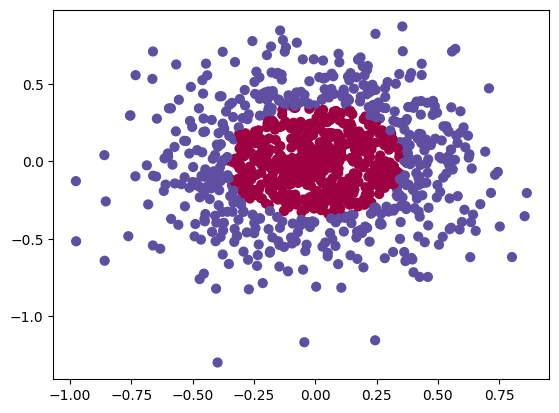

In [2]:

N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2,
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

## Función de inicialización de parámetros
La función de inicialización de parámetros en una red neuronal crea y asigna valores iniciales a los pesos y bias de cada neurona. Esto es crucial para el inicio del entrenamiento, ya que unos buenos parámetros iniciales pueden ayudar a converger más rápido y evitar problemas como el estancamiento. En el contexto del curso, esta función asegura que los pesos estén en un rango adecuado para el aprendizaje, permitiendo que la red neuronal comience a aprender de manera efectiva a partir de los datos que se le proporcionan.

In [3]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

# Función de activación

In [4]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

In [5]:
x = np.linspace(10,-10,100)

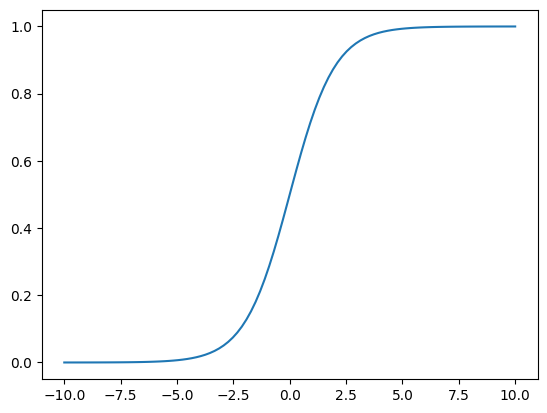

In [6]:
plt.plot(x,sigmoid(x))

## Función de entrenamiento

In [86]:
def relu(x, derivate = False):
    if derivate:
        # Crear una copia para no modificar el array original
        x_copy = np.copy(x)
        x_copy[x_copy <= 0] = 0
        x_copy[x_copy > 0] = 1
        return x_copy
    else:
        return np.maximum(0,x)


def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data

    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:
  # Backpropagation
        params['dZ3'] =  output - Y
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * (params['Z2'] > 0)

        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * (params['Z1'] > 0)

        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])




        ## Gradinet Descent:

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr

    return output

## Entrenando la red

En este notebook se cambia la función de pérdida de mse a entropía cruzada, que penaliza más fuertemente las predicciones que están lejos de la etiqueta verdadera.

In [87]:
def cross_entropy_loss(Y_true, Y_pred):

    epsilon = 1e-15
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
    return -np.mean(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred))

In [78]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)

errors = []
for _ in range(50000):
    output = train(X,0.0001,params)
    if _ % 25 == 0:
        current_loss = cross_entropy_loss(Y,output)
        print(current_loss)
        errors.append(current_loss)


0.7071872774202096
0.6933076211537748
0.6888979525475586
0.6864944634650333
0.6842488786846557
0.6818611682874249
0.6792082964758811
0.6762087084502598
0.672818625279363
0.6689903735845472
0.6647487405701971
0.6600185830368724
0.6547811635075895
0.6488274764695796
0.6419087789896003
0.6337661433966596
0.6241574802587698
0.6126380910805066
0.5988565294837792
0.5823096397115762
0.5626848929221023
0.5405781316039858
0.5171731152958448
0.49275284605830383
0.4676688034805916
0.44129249542669596
0.4102009430628824
0.367709607236099
0.3334921521237653
0.3038723398428137
0.2786262208265849
0.2565346368776597
0.23745425621388502
0.22100738757172156
0.2067643882996071
0.19445334630295166
0.1838205248198875
0.17448230623607697
0.16630361789112522
0.15903537401822262
0.15254349349865404
0.14673550885805595
0.1415227922671805
0.13679244287859926
0.13249011478009476
0.1285726468680938
0.1250005682375449
0.12172003518831756
0.11869914208827859
0.11590485641048874
0.11331253426795161
0.110898051532334

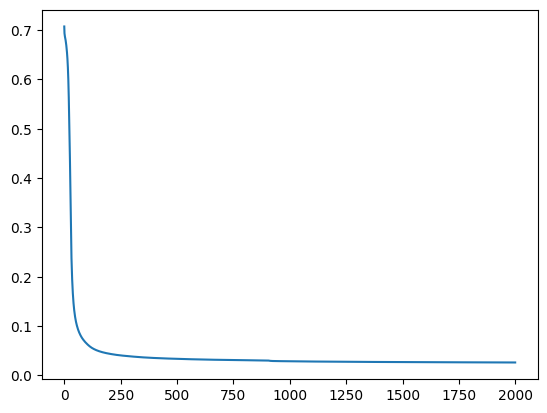

In [79]:
plt.plot(errors)

### Probando sobre datos nuevos

In [80]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [81]:
y = np.where(y >= 0.5, 1, 0)

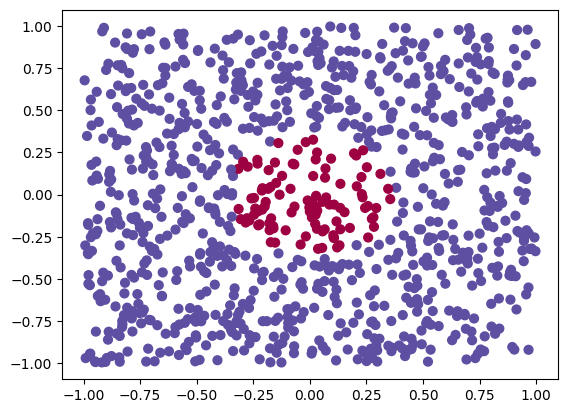

In [82]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

## Malla de visualización

In [83]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [84]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

<ipython-input-84-608089885525>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)


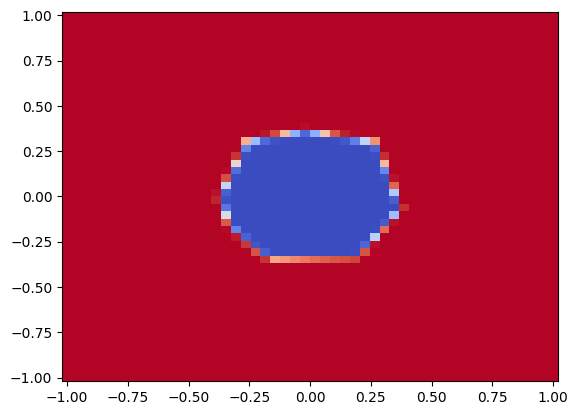

In [85]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')